<a href="https://colab.research.google.com/github/Devopriya-Tirtho/3D-GPUGraphLayout-Codebase/blob/main/Yeast_Circos_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir pycircos
%cd pycircos
!mkdir sample_data
%cd sample_data
#The following example data was downloaded from https://venyao.xyz/shinyCircos/.

!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_barplot.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_chromosome_cytoband.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_chromosome_general.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_links.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_point.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_rect_gradual.csv
%cd ..
!wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/__init__.py
!wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/pycircos.py
!wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/tree.py
%cd ..
!pip install biopython

mkdir: cannot create directory ‘pycircos’: File exists
/content/pycircos
mkdir: cannot create directory ‘sample_data’: File exists
/content/pycircos/sample_data
--2024-01-15 16:25:08--  https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_barplot.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ponnhide/pyCircos-examples/main/example_notebooks/sample_data/example_data_barplot.csv [following]
--2024-01-15 16:25:08--  https://raw.githubusercontent.com/ponnhide/pyCircos-examples/main/example_notebooks/sample_data/example_data_barplot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sen

In [ ]:
import pycircos
import collections
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

   Source  Target   Weight
0       1       2  10000.0
1       2       3  10000.0
2       3       4  10000.0
3       4       5  10000.0
4       5       6  10000.0


In [ ]:
def bin_to_chromosome(bin_number):
    if 1 <= bin_number <= 558:
        return 1
    elif 559 <= bin_number <= 1012:
        return 2
    elif 1013 <= bin_number <= 1258:
        return 3
    else:
        return None  # or you could return 0 or some other value to indicate an out-of-range bin number

# Apply the function to the 'Source' and 'Target' columns to get the chromosome assignments
df['Source_Chromosome'] = df['Source'].apply(bin_to_chromosome)
df['Target_Chromosome'] = df['Target'].apply(bin_to_chromosome)

# Display the DataFrame to verify the results
print(df.head())

   Source  Target   Weight  Source_Chromosome  Target_Chromosome
0       1       2  10000.0                  1                  1
1       2       3  10000.0                  1                  1
2       3       4  10000.0                  1                  1
3       4       5  10000.0                  1                  1
4       5       6  10000.0                  1                  1


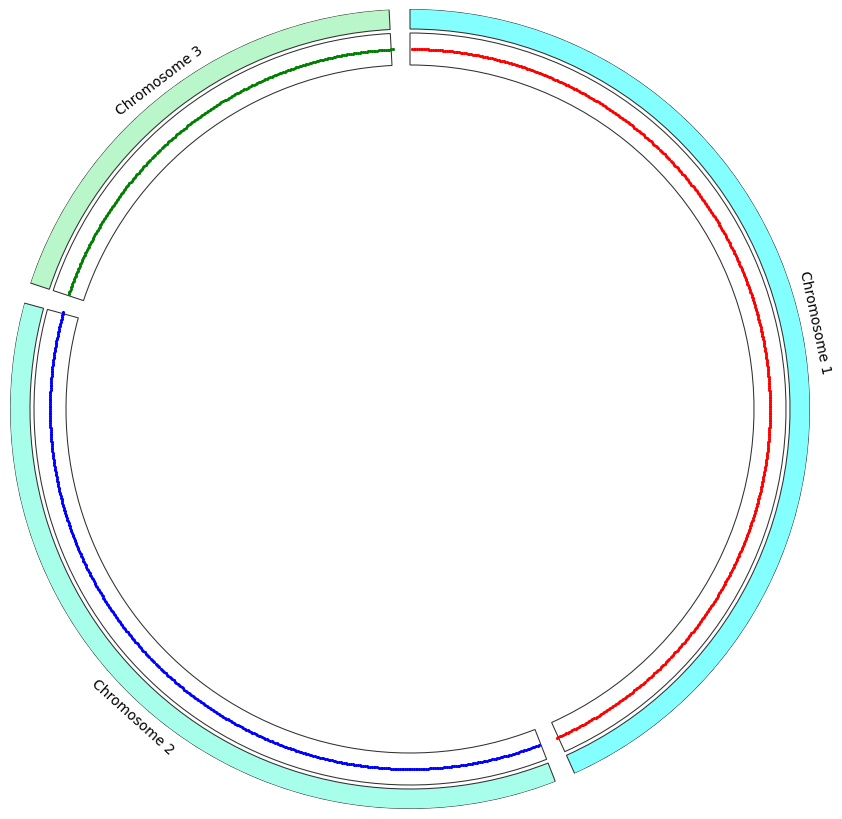

In [ ]:
import pycircos
import matplotlib.pyplot as plt

# Initialize the Circos plot object
circle = pycircos.Gcircle()

# Define chromosome lengths based on bin numbers
chromosome_lengths = {
    'Chromosome 1': 558,
    'Chromosome 2': 1012 - 559 + 1,
    'Chromosome 3': 1258 - 1013 + 1
}

# Define chromosome arcs
chromosome_arcs = {
    chrom: pycircos.Garc(arc_id=chrom, size=length, interspace=3, raxis_range=(950, 1000), labelposition=60, label_visible=True)
    for chrom, length in chromosome_lengths.items()
}

# Add arcs to the plot
for arc in chromosome_arcs.values():
    circle.add_garc(arc)

# Set garcs
circle.set_garcs()

# Define colors for each chromosome
chromosome_colors = {
    'Chromosome 1': 'red',
    'Chromosome 2': 'blue',
    'Chromosome 3': 'green'
}

# Plot bins as dots
for chrom, arc in chromosome_arcs.items():
    bin_positions = [i for i in range(1, chromosome_lengths[chrom] + 1)]  # Bin positions from 1 to chromosome length
    circle.scatterplot(chrom, data=[1] * len(bin_positions), positions=bin_positions,
                       rlim=[0, 2], raxis_range=(860, 940), facecolor=chromosome_colors[chrom], spine=True)


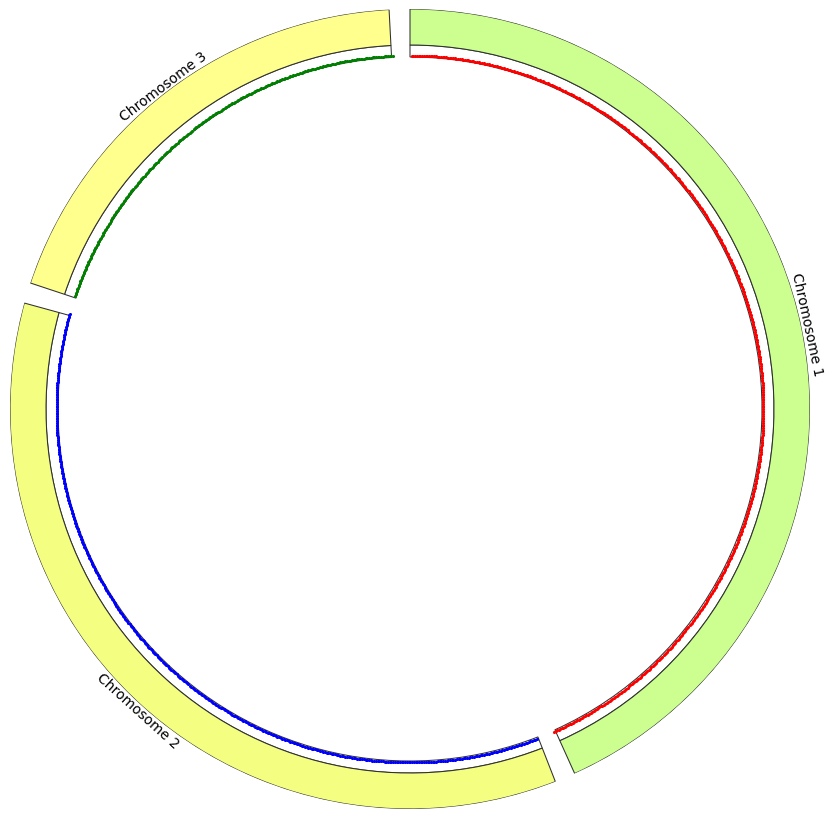

In [ ]:
import pycircos
import matplotlib.pyplot as plt

# Initialize the Circos plot object
circle = pycircos.Gcircle()

# Define chromosome lengths based on bin numbers
chromosome_lengths = {
    'Chromosome 1': 558,
    'Chromosome 2': 1012 - 559 + 1,
    'Chromosome 3': 1258 - 1013 + 1
}

# Define chromosome arcs
chromosome_arcs = {
    chrom: pycircos.Garc(arc_id=chrom, size=length, interspace=3, raxis_range=(910, 1000), labelposition=60, label_visible=True)
    for chrom, length in chromosome_lengths.items()
}

# Add arcs to the plot
for arc in chromosome_arcs.values():
    circle.add_garc(arc)

# Set garcs
circle.set_garcs()

# Define colors for each chromosome
chromosome_colors = {
    'Chromosome 1': 'red',
    'Chromosome 2': 'blue',
    'Chromosome 3': 'green'
}

# Plot bins as dots
for chrom, arc in chromosome_arcs.items():
    bin_positions = [i for i in range(1, chromosome_lengths[chrom] + 1)]  # Bin positions from 1 to chromosome length
    circle.scatterplot(chrom, data=[1] * len(bin_positions), positions=bin_positions,
                       rlim=[0, 8], raxis_range=(880, 910), facecolor=chromosome_colors[chrom], spine=True)


In [ ]:
import pandas as pd
import numpy as np
import pycircos
import matplotlib.pyplot as plt


def get_chromosome_name(bin_number):
    if 1 <= bin_number <= 558:
        return "Chromosome 1"
    elif 559 <= bin_number <= 1012:
        return "Chromosome 2"
    elif 1013 <= bin_number <= 1258:
        return "Chromosome 3"
    else:
        raise ValueError(f"Unexpected bin number: {bin_number}")


# Step 1: Read the CSV file
edge_data = pd.read_csv('/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv')

# Step 2: Exclude linear reactions
non_linear_data = edge_data[edge_data['Weight'] != 10000.00]


# Calculate min and max weights for normalization
min_weight = non_linear_data['Weight'].min()
max_weight = non_linear_data['Weight'].max()


# Normalize the weights of the remaining interactions
non_linear_data = non_linear_data.copy()  # Create a copy to avoid SettingWithCopyWarning
non_linear_data['NormalizedWeight'] = (non_linear_data['Weight'] - min_weight) / (max_weight - min_weight)

# Identify inter-chromosomal interactions
intra_chromosomal_data = non_linear_data[
    non_linear_data.apply(lambda row: get_chromosome_name(row['Source']) == get_chromosome_name(row['Target']), axis=1)
]

# Step 5: Select the top 20% of inter-chromosomal interactions based on normalized weights
top_20_percent_intra_chromosomal = intra_chromosomal_data.nlargest(int(0.2 * len(intra_chromosomal_data)), 'NormalizedWeight')

# Step 6: Plot these selected interactions on your Circos plot
for index, row in top_20_percent_intra_chromosomal.iterrows():
    source_chromosome = get_chromosome_name(row['Source'])
    target_chromosome = get_chromosome_name(row['Target'])  # Should be the same as source_chromosome
    source = (source_chromosome, row['Source'], row['Source'] + 1, 630)
    destination = (target_chromosome, row['Target'], row['Target'] + 1, 630)

    # Assuming the facecolor is in RGB format and you want an alpha of 0.5
    rgb_facecolor = circle.garc_dict[source_chromosome].facecolor
    rgba_facecolor = (*rgb_facecolor, 0.5)

    circle.chord_plot(source, destination, facecolor=circle.garc_dict[source_chromosome].facecolor)



In [ ]:
def get_chromosome_name(bin_number):
    if 1 <= bin_number <= 558:
        return "Chromosome 1"
    elif 559 <= bin_number <= 1012:
        return "Chromosome 2"
    elif 1013 <= bin_number <= 1258:
        return "Chromosome 3"
    else:
        raise ValueError(f"Unexpected bin number: {bin_number}")

In [ ]:
# Step 1: Read the CSV file
edge_data = pd.read_csv('/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv')

# Step 2: Exclude linear reactions
non_linear_data = edge_data[edge_data['Weight'] != 10000.00]

In [ ]:
print(non_linear_data)

        Source  Target    Weight
1255         6       8  0.047480
1256         6       9  0.041008
1257         6      10  0.033838
1258         6      11  0.021042
1259         6      12  0.019793
...        ...     ...       ...
743038     400    1251  0.001167
743039     400    1252  0.000753
743040     400    1253  0.000120
743041     400    1254  0.000479
743042     400    1255  0.000577

[741587 rows x 3 columns]


In [ ]:
# Calculate min and max weights for normalization
min_weight = non_linear_data['Weight'].min()
max_weight = non_linear_data['Weight'].max()

In [ ]:
print(min_weight)

1.08e-05


In [ ]:
print(max_weight)

0.599636567


In [ ]:
# Normalize the weights of the remaining interactions
non_linear_data = non_linear_data.copy()  # Create a copy to avoid SettingWithCopyWarning
non_linear_data['NormalizedWeight'] = (non_linear_data['Weight'] - min_weight) / (max_weight - min_weight)

In [ ]:
print(non_linear_data)

        Source  Target    Weight  NormalizedWeight
1255         6       8  0.047480          0.079165
1256         6       9  0.041008          0.068371
1257         6      10  0.033838          0.056414
1258         6      11  0.021042          0.035074
1259         6      12  0.019793          0.032991
...        ...     ...       ...               ...
743038     400    1251  0.001167          0.001929
743039     400    1252  0.000753          0.001238
743040     400    1253  0.000120          0.000182
743041     400    1254  0.000479          0.000781
743042     400    1255  0.000577          0.000945

[741587 rows x 4 columns]


In [ ]:
# Identify inter-chromosomal interactions
intra_chromosomal_data = non_linear_data[
    non_linear_data.apply(lambda row: get_chromosome_name(row['Source']) == get_chromosome_name(row['Target']), axis=1)
]

In [ ]:
print(intra_chromosomal_data)

        Source  Target    Weight  NormalizedWeight
1255         6       8  0.047480          0.079165
1256         6       9  0.041008          0.068371
1257         6      10  0.033838          0.056414
1258         6      11  0.021042          0.035074
1259         6      12  0.019793          0.032991
...        ...     ...       ...               ...
742435     400     552  0.000235          0.000374
742436     400     553  0.000250          0.000398
742437     400     554  0.000324          0.000522
742438     400     555  0.000432          0.000702
742439     400     556  0.000224          0.000356

[272192 rows x 4 columns]


## **Observation in Circos Plot Generation: 10th November**

---


## **I am modifying the non-linear dataset by checking the source and target bin, whereas I need to check source and target chromosome. And then detect if this is intra or inter chromosomal reaction and then I will try connecting lines between bins.**

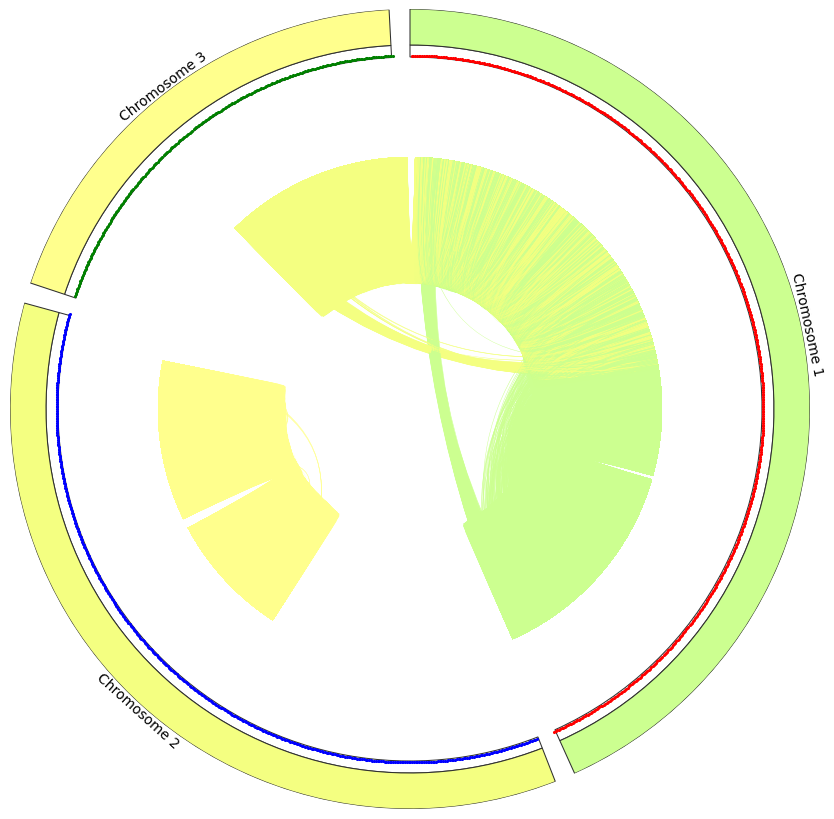

In [ ]:
# Display the plot
circle.figure

In [ ]:
import pandas as pd
import numpy as np
import pycircos
import matplotlib.pyplot as plt


def get_chromosome_name(bin_number):
    if 1 <= bin_number <= 558:
        return "Chromosome 1"
    elif 559 <= bin_number <= 1012:
        return "Chromosome 2"
    elif 1013 <= bin_number <= 1258:
        return "Chromosome 3"
    else:
        raise ValueError(f"Unexpected bin number: {bin_number}")


# Step 1: Read the CSV file
edge_data = pd.read_csv('/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv')

# Step 2: Exclude linear reactions
non_linear_data = edge_data[edge_data['Weight'] != 10000.00]


# Calculate min and max weights for normalization
min_weight = non_linear_data['Weight'].min()
max_weight = non_linear_data['Weight'].max()

# Normalize the weights of the remaining interactions
non_linear_data = non_linear_data.copy()  # Create a copy to avoid SettingWithCopyWarning
non_linear_data['NormalizedWeight'] = (non_linear_data['Weight'] - min_weight) / (max_weight - min_weight)

# Identify inter-chromosomal interactions
inter_chromosomal_data = non_linear_data[
    non_linear_data.apply(lambda row: get_chromosome_name(row['Source']) != get_chromosome_name(row['Target']), axis=1)
]
# Step 5: Select the top 20% of inter-chromosomal interactions based on normalized weights
top_20_percent_inter_chromosomal = inter_chromosomal_data.nlargest(int(0.001 * len(inter_chromosomal_data)), 'NormalizedWeight')

bin_outer_radius = 860  # This should match the outer edge of the bin's radial position

# Within your plotting loop:
for index, row in top_20_percent_inter_chromosomal.iterrows():
    source_chromosome = get_chromosome_name(row['Source'])
    target_chromosome = get_chromosome_name(row['Target'])
    # Start/end the chords at the outer edge of the bins
    source = (source_chromosome, row['Source'], row['Source'] + 1, bin_outer_radius)
    destination = (target_chromosome, row['Target'], row['Target'] + 1, bin_outer_radius)
    circle.chord_plot(source, destination, facecolor=chromosome_colors[source_chromosome])




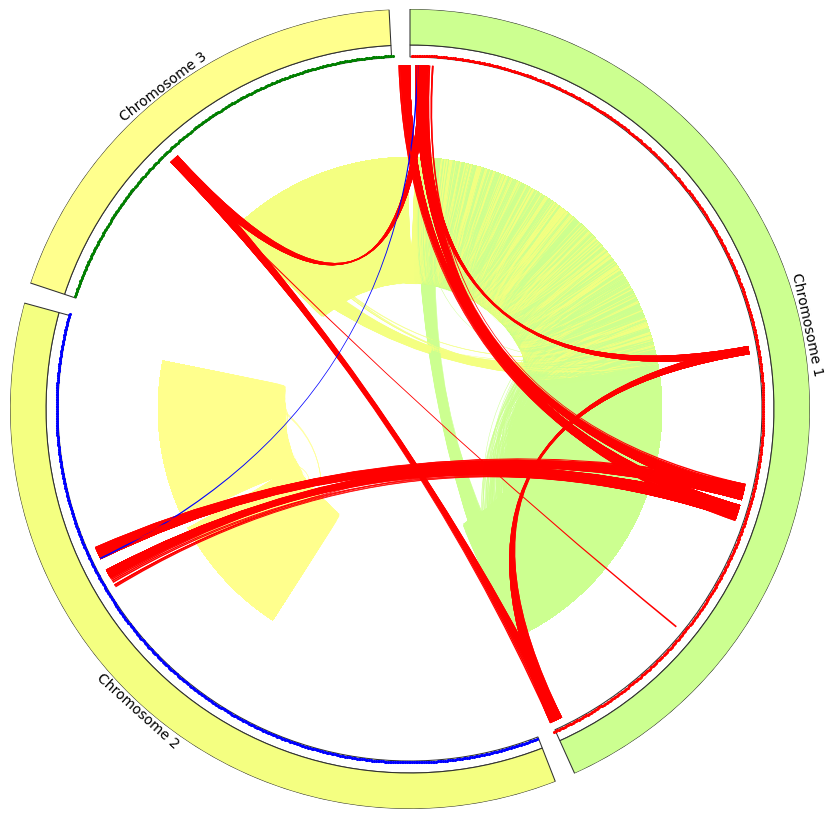

In [ ]:
# Display the plot
circle.figure

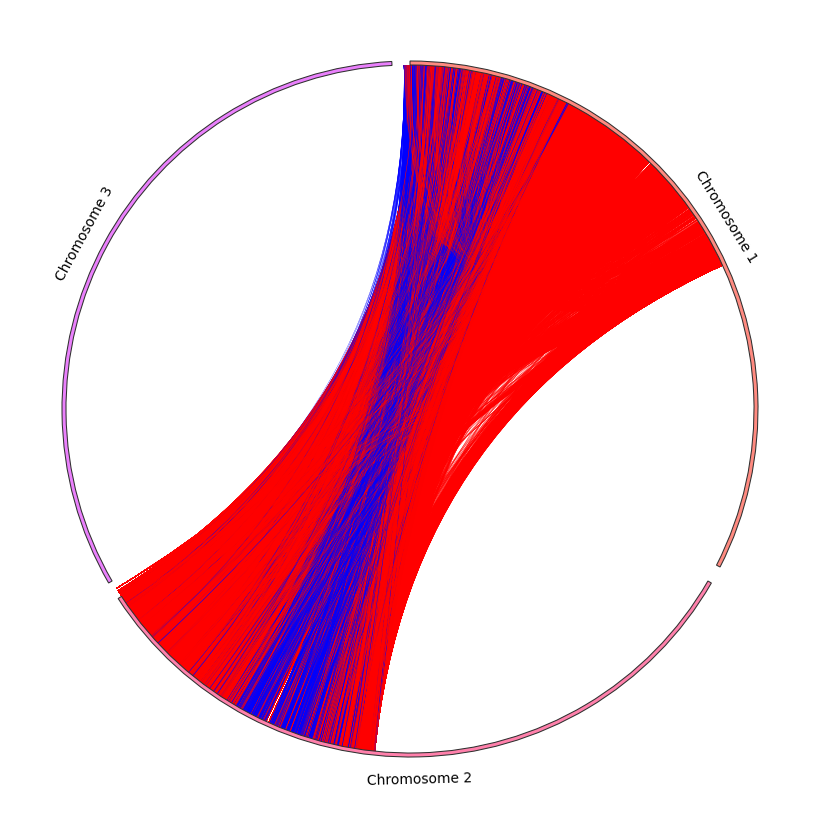

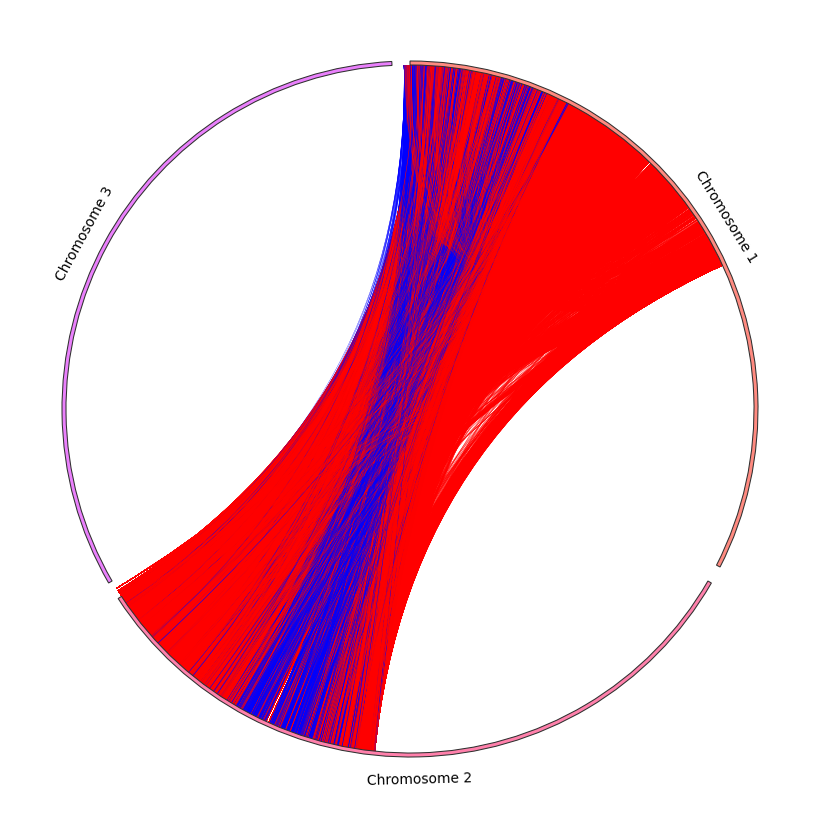

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import pycircos
import matplotlib.pyplot as plt

# Define the function to get chromosome names based on bin numbers
def get_chromosome_name(bin_number):
    if 1 <= bin_number <= 558:
        return "Chromosome 1"
    elif 559 <= bin_number <= 1012:
        return "Chromosome 2"
    elif 1013 <= bin_number <= 1258:
        return "Chromosome 3"
    else:
        raise ValueError(f"Unexpected bin number: {bin_number}")

# Read the CSV file into a DataFrame
edge_data = pd.read_csv('/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv')

# Filter out linear reactions
non_linear_data = edge_data[edge_data['Weight'] != 10000.00].copy()  # Avoid SettingWithCopyWarning

# Normalize the weights for non-linear interactions
min_weight = non_linear_data['Weight'].min()
max_weight = non_linear_data['Weight'].max()
non_linear_data['NormalizedWeight'] = (non_linear_data['Weight'] - min_weight) / (max_weight - min_weight)

# Identify inter-chromosomal interactions
inter_chromosomal_data = non_linear_data[
    non_linear_data.apply(lambda row: get_chromosome_name(row['Source']) != get_chromosome_name(row['Target']), axis=1)
]

# Select the top 0.1% inter-chromosomal interactions by normalized weight
top_interactions = inter_chromosomal_data.nlargest(int(0.2 * len(inter_chromosomal_data)), 'NormalizedWeight')

# Initialize the Circos plot object
circle = pycircos.Gcircle()

# Define chromosome colors
chromosome_colors = {
    "Chromosome 1": "red",
    "Chromosome 2": "blue",
    "Chromosome 3": "green"
}

# Define the outer radius for the bins
bin_outer_radius = 860

# Add the chromosome arcs to the circle object
for chrom in chromosome_colors.keys():
    arc = pycircos.Garc(arc_id=chrom, size=1000, interspace=3, raxis_range=(bin_outer_radius, bin_outer_radius+10), labelposition=60, label_visible=True)
    circle.add_garc(arc)

# Set the arcs to the circle
circle.set_garcs()

# Plot the selected interactions
for index, row in top_interactions.iterrows():
    source_chromosome = get_chromosome_name(row['Source'])
    target_chromosome = get_chromosome_name(row['Target'])
    # Start and end the chords at the outer edge of the bins
    source = (source_chromosome, row['Source'], row['Source'] + 1, bin_outer_radius)
    destination = (target_chromosome, row['Target'], row['Target'] + 1, bin_outer_radius)
    # Get the color for the source chromosome
    facecolor = chromosome_colors[source_chromosome]
    circle.chord_plot(source, destination, facecolor=facecolor)

# Display the plot
plt.figure(figsize=(10, 10))
circle.figure

In [ ]:
import pandas as pd
import numpy as np
import pycircos
import matplotlib.pyplot as plt


def get_chromosome_name(bin_number):
    if 1 <= bin_number <= 558:
        return "Chromosome 1"
    elif 559 <= bin_number <= 1012:
        return "Chromosome 2"
    elif 1013 <= bin_number <= 1258:
        return "Chromosome 3"
    else:
        raise ValueError(f"Unexpected bin number: {bin_number}")


# Step 1: Read the CSV file
edge_data = pd.read_csv('/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv')

# Step 2: Exclude linear reactions
non_linear_data = edge_data[edge_data['Weight'] != 10000.00]


# Calculate min and max weights for normalization
min_weight = non_linear_data['Weight'].min()
max_weight = non_linear_data['Weight'].max()


# Normalize the weights of the remaining interactions
non_linear_data = non_linear_data.copy()  # Create a copy to avoid SettingWithCopyWarning
non_linear_data['NormalizedWeight'] = (non_linear_data['Weight'] - min_weight) / (max_weight - min_weight)

# Identify inter-chromosomal interactions
intra_chromosomal_data = non_linear_data[
    non_linear_data.apply(lambda row: get_chromosome_name(row['Source']) == get_chromosome_name(row['Target']), axis=1)
]

# Step 5: Select the top 20% of inter-chromosomal interactions based on normalized weights
top_20_percent_intra_chromosomal = intra_chromosomal_data.nlargest(int(0.2 * len(intra_chromosomal_data)), 'NormalizedWeight')

# Step 6: Plot these selected interactions on your Circos plot
for index, row in top_20_percent_intra_chromosomal.iterrows():
    source_chromosome = get_chromosome_name(row['Source'])
    target_chromosome = get_chromosome_name(row['Target'])  # Should be the same as source_chromosome
    source = (source_chromosome, row['Source'], row['Source'] + 1, 630)
    destination = (target_chromosome, row['Target'], row['Target'] + 1, 630)

    # Assuming the facecolor is in RGB format and you want an alpha of 0.5
    rgb_facecolor = circle.garc_dict[source_chromosome].facecolor
    rgba_facecolor = (*rgb_facecolor, 0.5)

    circle.chord_plot(source, destination, facecolor=circle.garc_dict[source_chromosome].facecolor)



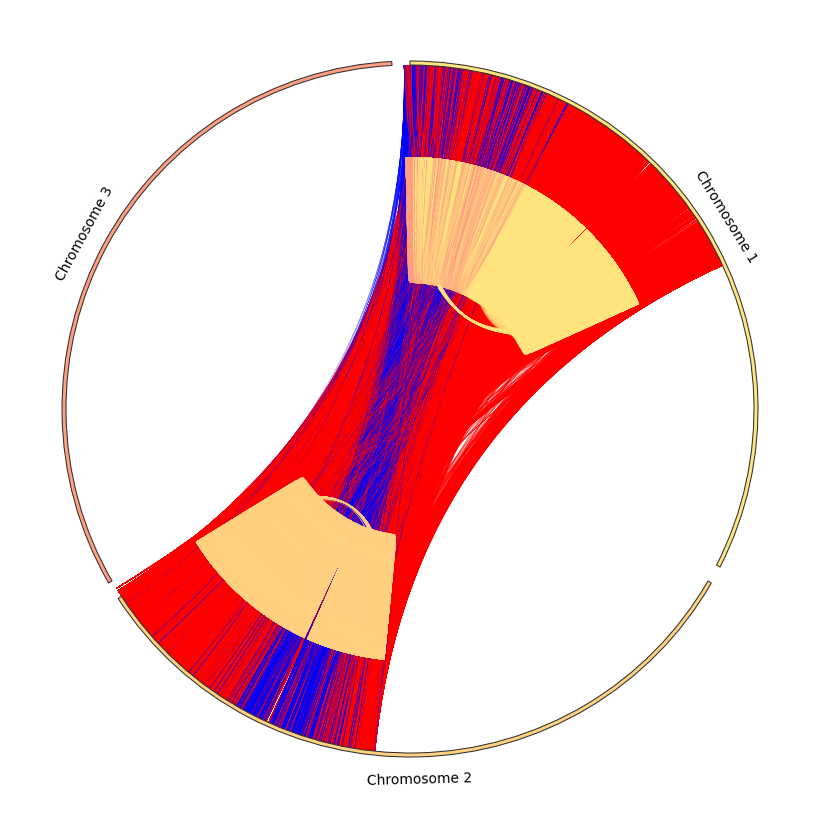

In [ ]:
# Display the plot
circle.figure

In [ ]:
import pandas as pd
import numpy as np
import pycircos
import matplotlib.pyplot as plt


def get_chromosome_name(bin_number):
    if 1 <= bin_number <= 558:
        return "Chromosome 1"
    elif 559 <= bin_number <= 1012:
        return "Chromosome 2"
    elif 1013 <= bin_number <= 1258:
        return "Chromosome 3"
    else:
        raise ValueError(f"Unexpected bin number: {bin_number}")


# Step 1: Read the CSV file
edge_data = pd.read_csv('/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv')

# Step 2: Exclude linear reactions
non_linear_data = edge_data[edge_data['Weight'] != 10000.00]


# Calculate min and max weights for normalization
min_weight = non_linear_data['Weight'].min()
max_weight = non_linear_data['Weight'].max()


# Normalize the weights of the remaining interactions
non_linear_data = non_linear_data.copy()  # Create a copy to avoid SettingWithCopyWarning
non_linear_data['NormalizedWeight'] = (non_linear_data['Weight'] - min_weight) / (max_weight - min_weight)

# Identify inter-chromosomal interactions
intra_chromosomal_data = non_linear_data[
    non_linear_data.apply(lambda row: get_chromosome_name(row['Source']) == get_chromosome_name(row['Target']), axis=1)
]

# Step 5: Select the top 20% of inter-chromosomal interactions based on normalized weights
top_20_percent_intra_chromosomal = intra_chromosomal_data.nsmallest(int(0.05 * len(intra_chromosomal_data)), 'NormalizedWeight')

# Step 6: Plot these selected interactions on your Circos plot
for index, row in top_20_percent_intra_chromosomal.iterrows():
    source_chromosome = get_chromosome_name(row['Source'])
    target_chromosome = get_chromosome_name(row['Target'])  # Should be the same as source_chromosome
    source = (source_chromosome, row['Source'], row['Source'] + 1, 630)
    destination = (target_chromosome, row['Target'], row['Target'] + 1, 630)

    # Assuming the facecolor is in RGB format and you want an alpha of 0.5
    rgb_facecolor = circle.garc_dict[source_chromosome].facecolor
    rgba_facecolor = (*rgb_facecolor, 0.5)

    circle.chord_plot(source, destination, facecolor=circle.garc_dict[source_chromosome].facecolor)

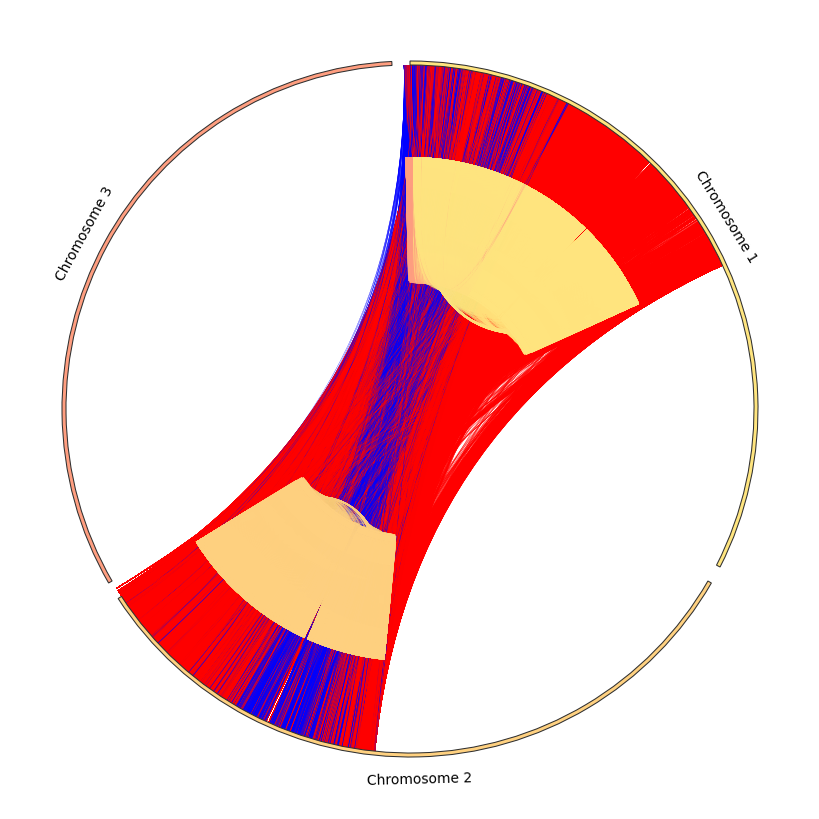

In [ ]:
# Display the plot
circle.figure

#**13th January: Developing new Circos Plot**

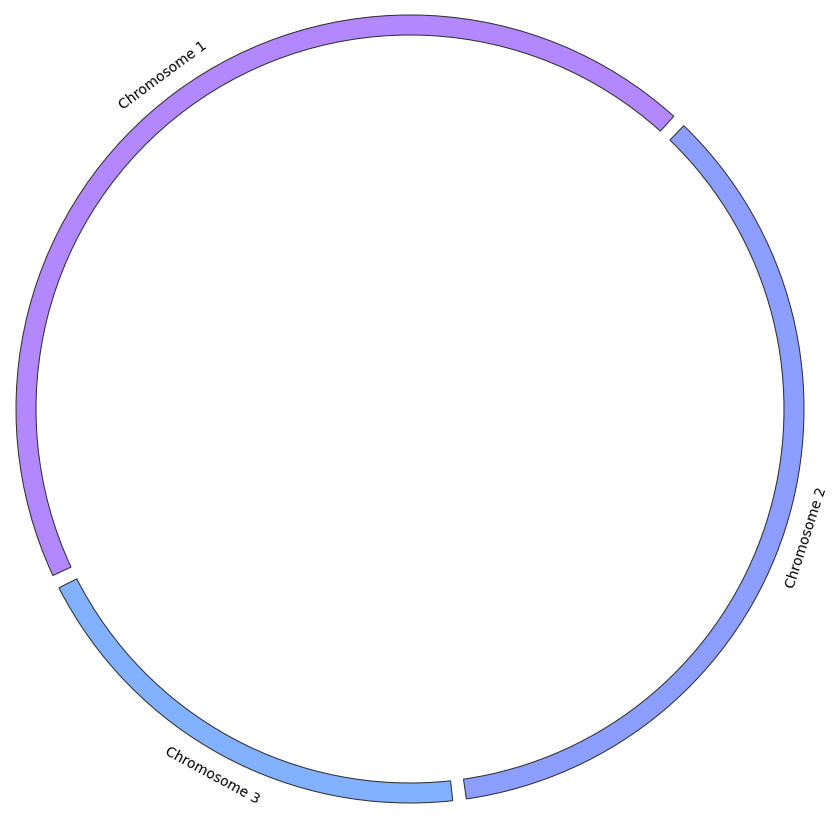

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc

# Define the chromosome bin ranges
chromosome_bins = {
    'Chromosome 1': (1, 558),
    'Chromosome 2': (559, 1012),
    'Chromosome 3': (1013, 1258)
}

# Initialize the Gcircle object for the circos plot
circle = Gcircle(figsize=(8, 8))

# Add Garc objects for each chromosome segment to the circle
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    # Calculate the length of each chromosome segment for the Garc size
    length = end_bin - start_bin + 1
    # Create the Garc object with the specified size and add it to the circle
    arc = Garc(arc_id=chrom, size=length, interspace=2, raxis_range=(935, 985), labelposition=80, label_visible=True)
    circle.add_garc(arc)

# Set the chromosome arcs positions on the circle
circle.set_garcs(-115, 245)

# Read the data, omitting rows with interaction values of 10000
file_path = '/content/drive/MyDrive/Circos Plot Project Graph/22th September/edge_list_Combined_with_NewYT_normalized_edited.csv'
data = []
with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        source, target, weight = line.strip().split(',')
        weight = float(weight)
        if weight != 10000:
            data.append((int(source), int(target), weight))

# (Here you would continue processing the data and adding it to the plot)



In [ ]:
# Initialize a dictionary to store the maximum interaction value for each source bin
max_interaction_values = {bin_id: 0 for bin_id in range(1, 1259)}  # Assuming bin IDs start at 1 and end at 1258

# Process the data to find the maximum interaction value for each source bin
for source, target, weight in data:
    if weight > max_interaction_values[source]:
        max_interaction_values[source] = weight

# Convert the max interaction values to a list if needed, where index corresponds to the bin ID minus one
max_interaction_values_list = [max_interaction_values[bin_id] for bin_id in range(1, 1259)]

# Now max_interaction_values_list contains the highest interaction value for each corresponding source bin
print(max_interaction_values_list)

[0, 0, 0, 0, 0, 0.04748, 0.058722, 0.053781, 0.032022, 0.041214, 0.040355, 0.041891, 0.043855, 0.04137, 0.043, 0.045734, 0.04562, 0.039388, 0.044606, 0.046373, 0.04182, 0.035167, 0.042717, 0.036082, 0.046938, 0.052202, 0.054773, 0.052421, 0.043571, 0.0501, 0.048612, 0.046099, 0.035243, 0.039555, 0.040853, 0.045499, 0.049629, 0.046219, 0.035506, 0.046445, 0.048364, 0.036718, 0.045364, 0.04052, 0.040578, 0.038492, 0.039609, 0.051144, 0.043548, 0.040615, 0.045677, 0.036417, 0.032257, 0.053846, 0.042486, 0.036694, 0.045639, 0.045785, 0.038362, 0.040457, 0.041452, 0.043875, 0.048814, 0.038442, 0.035366, 0.041907, 0.041126, 0.047319, 0.045822, 0.041593, 0.048011, 0.050867, 0.03354, 0.033582, 0.040051, 0.041409, 0.040371, 0.040451, 0.045261, 0.045571, 0.043518, 0.041631, 0.043753, 0.045613, 0.038492, 0.049536, 0.043239, 0.029569, 0.046585, 0.048118, 0.043149, 0.040997, 0.03551, 0.043031, 0.041995, 0.033945, 0.043237, 0.042133, 0.034169, 0.031773, 0.035538, 0.048068, 0.043284, 0.043691, 0.0421

In [ ]:
import matplotlib.colors as mcolors

# Assuming max_interaction_values_list is already computed as before
# Normalize the interaction values to the range [0, 1]
norm = plt.Normalize(min(max_interaction_values_list), max(max_interaction_values_list))

# Create color maps for each chromosome
color_maps = {
    'Chromosome 1': mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"]),
    'Chromosome 2': mcolors.LinearSegmentedColormap.from_list("", ["lightblue", "darkblue"]),
    'Chromosome 3': mcolors.LinearSegmentedColormap.from_list("", ["lightgreen", "darkgreen"])
}

# Create a color map from light red to dark red
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"])
# Define the radial range for the cytoband, increase the height by adjusting these values
inner_radius = 900  # Decrease this value to make the band taller (move inner circle down)
outer_radius = 935  # Increase this value to make the band taller (move outer circle up)

# Add cytobands to the circos plot
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    cmap = color_maps[chrom]
    for bin_id in range(start_bin, end_bin + 1):
        interaction_value = max_interaction_values[bin_id]
        color = cmap(norm(interaction_value))

        # Calculate the position of the bin within the chromosome arc
        position = bin_id - start_bin

        # Add a barplot for this bin with the color based on the interaction value
        circle.barplot(chrom, data=[1], positions=[position], width=1,
                       raxis_range=(inner_radius, outer_radius), facecolor=color, edgecolor=color)

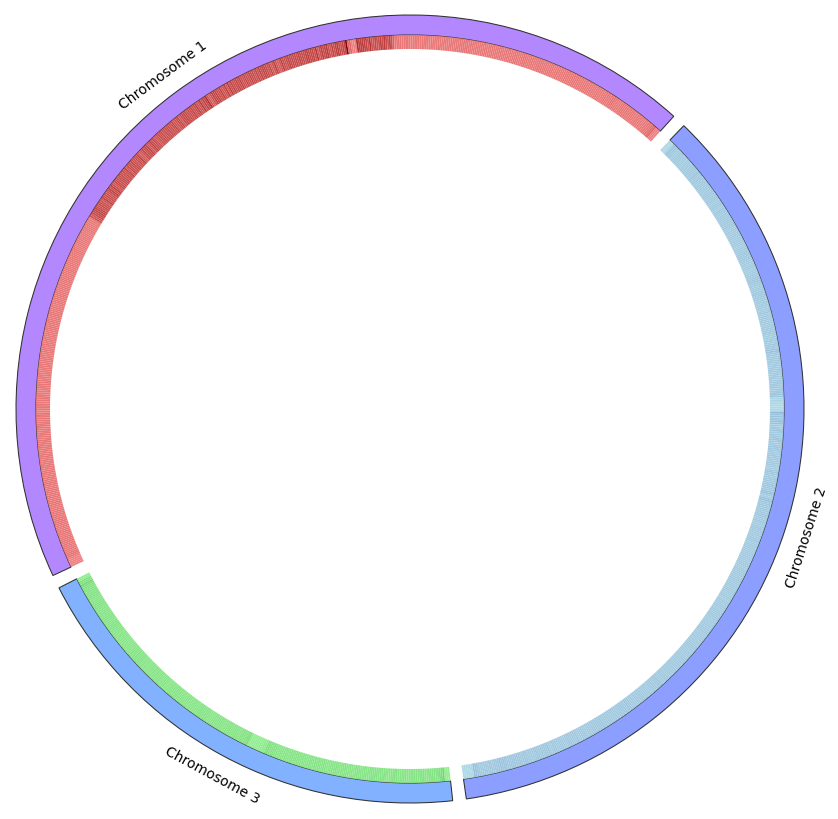

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# We'll use the max_interaction_values you computed earlier
# vmin and vmax are the minimum and maximum values of your interaction values
import pycircos

# Calculate vmin and vmax from max_interaction_values
vmin, vmax = min(max_interaction_values.values()), max(max_interaction_values.values())

# Set the radius range for the scatter plot
scatter_raxis_range = (810, 890)  # Adjust this as necessary to fit your plot

# Add scatter plot to the circos plot for each bin
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    for bin_id in range(start_bin, end_bin + 1):
        if bin_id in max_interaction_values:  # Ensure the bin_id is in your data
            interaction_value = max_interaction_values[bin_id]
            position = bin_id - start_bin
            circle.scatterplot(chrom, data=[interaction_value], positions=[position],
                               rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
                               raxis_range=scatter_raxis_range, facecolor="orangered", spine=True)

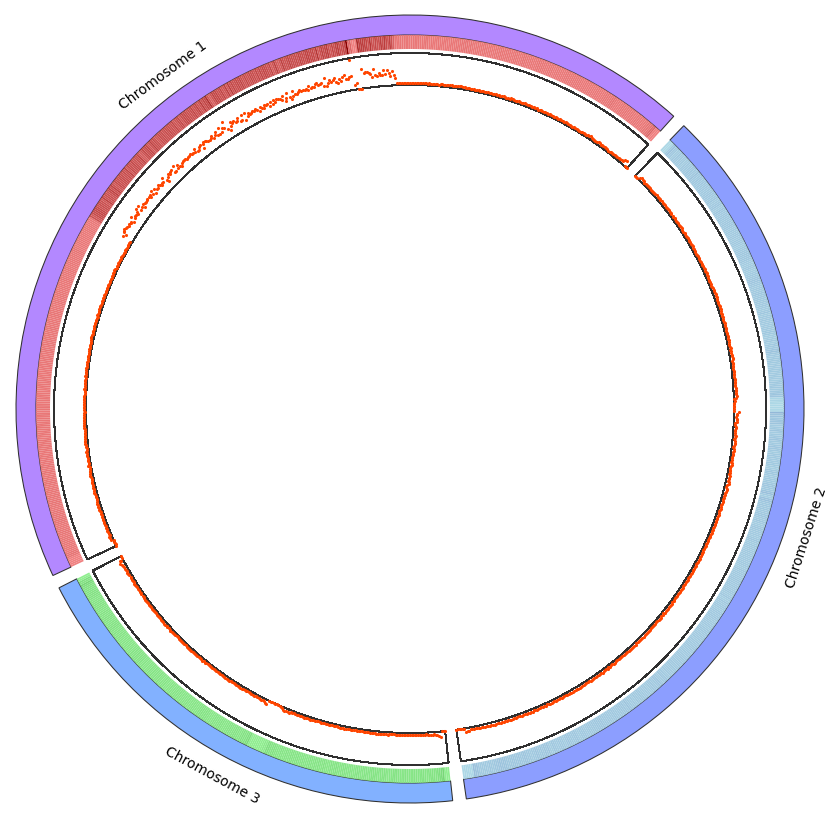

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# Initialize dictionaries to track max and min values for each bin
max_inter_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_inter_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}
max_intra_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_intra_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}

# Function to determine the chromosome of a bin
def determine_chromosome(bin_id):
    for chrom, (start, end) in chromosome_bins.items():
        if start <= bin_id <= end:
            return chrom
    return None

# Classify each interaction and update max/min values
for source, target, weight in data:
    source_chrom = determine_chromosome(source)
    target_chrom = determine_chromosome(target)

    if source_chrom and target_chrom:
        if source_chrom == target_chrom:  # Intra-chromosomal
            max_intra_chromosomal[source] = max(max_intra_chromosomal[source], weight)
            min_intra_chromosomal[source] = min(min_intra_chromosomal[source], weight) if weight > 0 else min_intra_chromosomal[source]
            max_intra_chromosomal[target] = max(max_intra_chromosomal[target], weight)
            min_intra_chromosomal[target] = min(min_intra_chromosomal[target], weight) if weight > 0 else min_intra_chromosomal[target]
        else:  # Inter-chromosomal
            max_inter_chromosomal[source] = max(max_inter_chromosomal[source], weight)
            min_inter_chromosomal[source] = min(min_inter_chromosomal[source], weight) if weight > 0 else min_inter_chromosomal[source]
            max_inter_chromosomal[target] = max(max_inter_chromosomal[target], weight)
            min_inter_chromosomal[target] = min(min_inter_chromosomal[target], weight) if weight > 0 else min_inter_chromosomal[target]

# Filter out bins with no interactions (inf values)
min_inter_chromosomal = {k: v for k, v in min_inter_chromosomal.items() if v != float('inf')}
min_intra_chromosomal = {k: v for k, v in min_intra_chromosomal.items() if v != float('inf')}

# Now you have four datasets:
# max_inter_chromosomal, min_inter_chromosomal, max_intra_chromosomal, min_intra_chromosomal


In [ ]:
# Assuming max_intra_chromosomal is already calculated
# Convert the dictionary values to a sorted list
sorted_max_values = sorted(max_intra_chromosomal.values(), reverse=True)

# Determine the 25% threshold value
top_25_percent_idx = int(len(sorted_max_values) * 0.25) - 1
top_25_percent_threshold = sorted_max_values[top_25_percent_idx]

# Now find the bins that are in the top 25%
top_25_percent_bins = [bin_id for bin_id, value in max_intra_chromosomal.items() if value >= top_25_percent_threshold]

# Fetch the corresponding source and target pairs from the original data
top_25_percent_interactions = [(source, target, weight) for source, target, weight in data if source in top_25_percent_bins or target in top_25_percent_bins]

# Filtering only intra-chromosomal interactions
top_25_percent_intra_chromosomal = []
for source, target, weight in top_25_percent_interactions:
    if determine_chromosome(source) == determine_chromosome(target):
        top_25_percent_intra_chromosomal.append((source, target, weight))

# Now top_25_percent_intra_chromosomal contains the desired interactions

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc
import collections

# Your existing setup for circos plot
# ...

# Prepare data for the heatmap
# Assuming top_25_percent_intra_chromosomal and max_intra_chromosomal are already defined

# Initialize arcdata_dict to store heatmap data for each chromosome separately
arcdata_dict = collections.defaultdict(lambda: {'positions': [], 'widths': [], 'values': []})

# Populate the arcdata_dict with data for the heatmap
for source, target, weight in top_25_percent_intra_chromosomal:
    max_value = max_intra_chromosomal[source]
    chrom = determine_chromosome(source)
    if chrom:
        position = source - chromosome_bins[chrom][0]  # Adjust position relative to chromosome start
        arcdata_dict[chrom]['positions'].append(position)
        arcdata_dict[chrom]['widths'].append(1)  # Assuming a width of 1 for each bin
        arcdata_dict[chrom]['values'].append(max_value)

# Add heatmaps to the circos plot for each chromosome separately
for chrom, arc_data in arcdata_dict.items():
    vmin, vmax = min(arc_data['values']), max(arc_data['values'])
    circle.heatmap(chrom, data=arc_data['values'], positions=arc_data['positions'],
                   width=arc_data['widths'], raxis_range=[750, 800], vmin=vmin, vmax=vmax,
                   cmap=plt.cm.viridis)

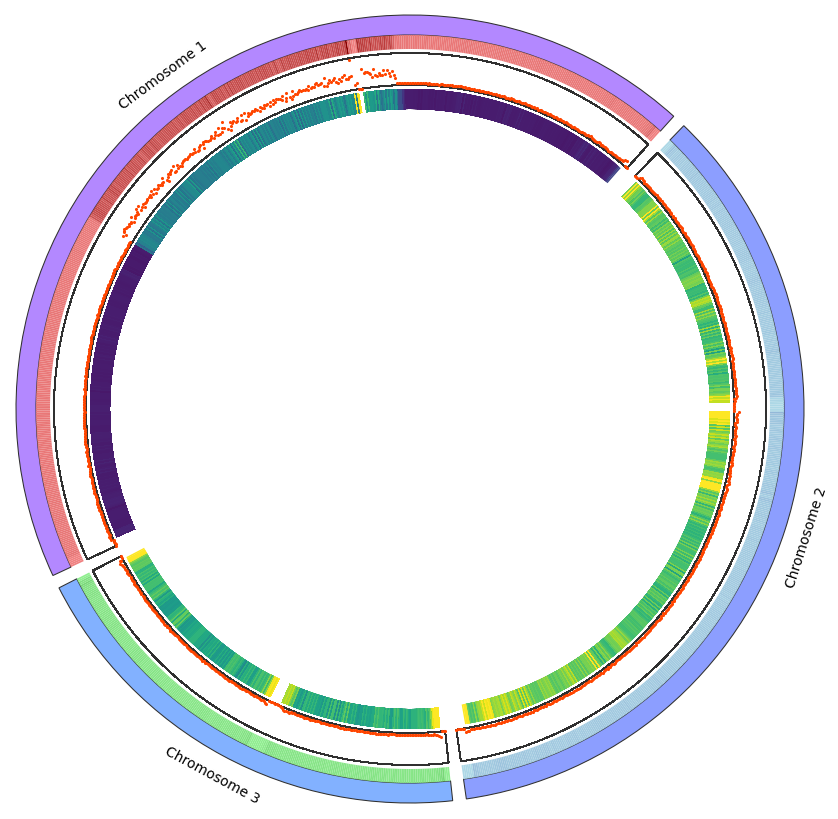

In [ ]:
circle.figure

# **intra-chromosomal bins (from max values I want to work with only top 25% of the intra-chromosomal bins) the values fall in the max 25% intra-chromosomal values,**

In [ ]:
import collections

# Assuming max_intra_chromosomal contains the max interaction values for each bin
# Sort these values and find the top 5% threshold
sorted_max_values = sorted(max_intra_chromosomal.values(), reverse=True)
top_5_percent_threshold = sorted_max_values[int(len(sorted_max_values) * 0.05) - 1]

# Filter interactions for the top 5% intra-chromosomal interactions
top_5_percent_interactions = [(source, target, weight) for source, target, weight in top_25_percent_intra_chromosomal if max_intra_chromosomal[source] >= top_5_percent_threshold and max_intra_chromosomal[target] >= top_5_percent_threshold]

# Create the chord plot for these interactions
for source, target, _ in top_5_percent_interactions:
    if determine_chromosome(source) == determine_chromosome(target):  # Ensure it's intra-chromosomal
        source_start = source - chromosome_bins[determine_chromosome(source)][0]
        source_end = source_start + 1  # Assuming a width of 1 for each bin
        target_start = target - chromosome_bins[determine_chromosome(target)][0]
        target_end = target_start + 1  # Assuming a width of 1 for each bin

        source_arc = (determine_chromosome(source), source_start, source_end, 770)
        target_arc = (determine_chromosome(target), target_start, target_end, 770)

        circle.chord_plot(source_arc, target_arc, facecolor=circle.garc_dict[determine_chromosome(source)].facecolor)


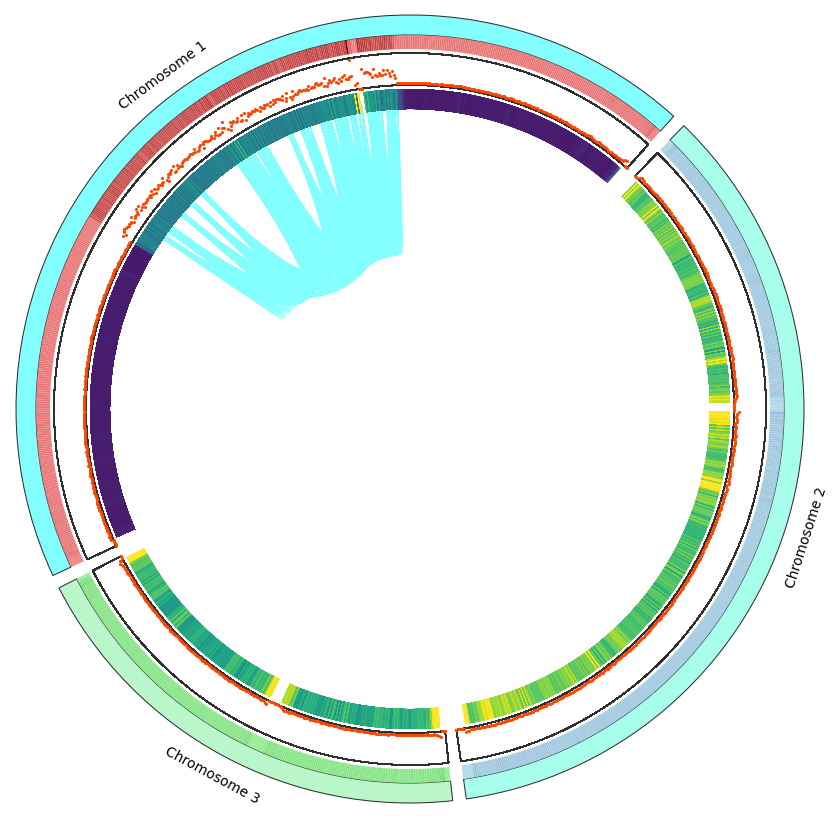

In [ ]:
circle.figure

In [ ]:
circle.figure.savefig("tutotial.pdf")

# **In this code: We first determine the top 25% threshold value for interaction values. Then, for each source bin within the top 25%, we identify the target bin with which it has the highest interaction value.Finally, we create a chord plot for each of these source-target pairs.**

In [ ]:
import collections

chromosome_colors = {
    'Chromosome 1': 'red',
    'Chromosome 2': 'green',
    'Chromosome 3': 'blue'
}

# Assuming max_intra_chromosomal contains the max interaction values for each bin
# Sort these values and find the top 25% threshold
sorted_max_values = sorted(max_intra_chromosomal.values(), reverse=True)
top_25_percent_threshold = sorted_max_values[int(len(sorted_max_values) * 0.25) - 1]

# Filter interactions for the top 25% intra-chromosomal interactions and find the highest interaction for each source
top_interaction_per_source = {}
for source, target, weight in data:
    source_chrom = determine_chromosome(source)
    target_chrom = determine_chromosome(target)
    if source_chrom == target_chrom and weight >= top_25_percent_threshold:
        if source not in top_interaction_per_source or top_interaction_per_source[source][2] < weight:
            top_interaction_per_source[source] = (source, target, weight)

# Create the chord plot for these interactions
# Create the chord plot for these interactions with different colors for each chromosome
for source, (source, target, _) in top_interaction_per_source.items():
    source_chrom = determine_chromosome(source)
    target_chrom = determine_chromosome(target)

    if source_chrom == target_chrom:  # Ensure it's intra-chromosomal
        source_start = source - chromosome_bins[source_chrom][0]
        source_end = source_start + 1  # Assuming a width of 1 for each bin
        target_start = target - chromosome_bins[target_chrom][0]
        target_end = target_start + 1  # Assuming a width of 1 for each bin

        source_arc = (source_chrom, source_start, source_end, 760)
        target_arc = (target_chrom, target_start, target_end, 760)

        # Use the color defined for the chromosome
        chord_color = chromosome_colors[source_chrom]
        circle.chord_plot(source_arc, target_arc, facecolor=chord_color)


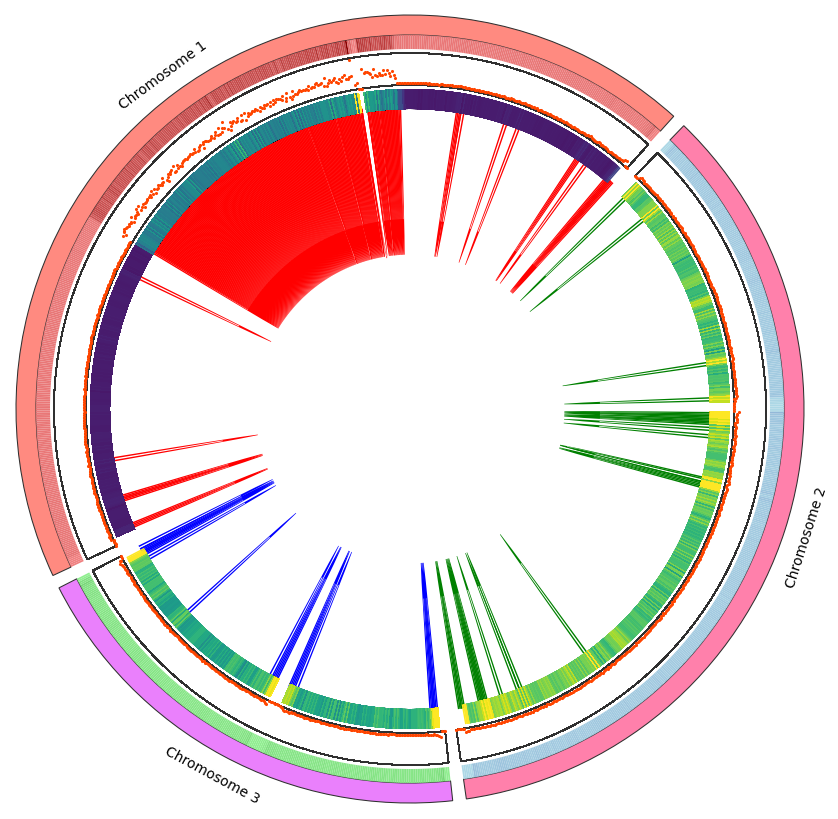

In [ ]:
circle.figure

In [ ]:
circle.figure.savefig("Generated Circos Plot 2.pdf")